## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
%pip install optree
%pip install keras tensorflow
%pip install matplotlib seaborn sckit-learn dmba xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 15.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 9.7/332.0 MB 50.6 MB/s eta 0:00:07
   -- ------------------------------------- 18.4/332.0 MB 45.5 MB/s eta 0:00:07
   --- ------------------------------------ 29.1/332.0 MB 47.7 MB/s eta 0:00:07
   ---- ----------------------------------- 40.1/332.0 MB 49.0 MB/s eta 0:00:06
   ------ --------------------------------- 52.2/332.0 MB 50.9 MB/s eta 0:00:06
   ------- -------------------------------- 62.4/332.0 MB 50.8 MB/s eta 0:00:06
   -------- ------------------------------- 72.1/332.0 MB 49.5 MB/s eta 0:00:06
   --------- ------------------------------ 77.9/332.0 MB 46.9 MB/s eta 0:00:06
   --------- ------------------------------ 79.7/332.0 MB 42.3 MB/s eta 0:00:06
   ---------- ----------------------------- 88.6/332.0 MB 42.5 M


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sckit-learn


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Masking

c:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

## Loading the dataset

In [4]:
import os

def get_dataset_file_path(file_name):
    # Get current working directory
    cwd = os.getcwd()

    # Construct relative path to the dataset
    relative_path = os.path.join(cwd, "..", "datasets", file_name)

    # Convert to absolute path
    absolute_path = os.path.abspath(relative_path)

    return absolute_path

# Example usage
file_name = "Book3.csv"
get_dataset_file_path(file_name)

'c:\\Users\\visha\\OneDrive\\Documents\\ML-Project\\Electricity_Load_n_Price_Forecasting\\datasets\\Book3.csv'

In [5]:

file_name = "Book3.csv"
file_path = get_dataset_file_path(file_name)
data = pd.read_csv(file_path)
display(data.head())

,Date,Hour,DryBulb,DewPnt,SYSLoad,NumDate
0,2004-01-01 00:00:00.0,1,37,25,12230,732000.0
1,2004-01-01 00:00:00.0,2,37,25,11534,732000.0
2,2004-01-01 00:00:00.0,3,39,24,11038,732000.0
3,2004-01-01 00:00:00.0,4,38,22,10777,732000.0
4,2004-01-01 00:00:00.0,5,37,20,10764,732000.0


In [7]:
file_name = "Holidays.xls"
file_path = get_dataset_file_path(file_name)
hdata = pd.read_excel(file_path)
display(hdata.head())

,Date,Holiday
0,2004-01-01,New Year's Day
1,2004-01-19,Martin Luther King Day
2,2004-02-16,President's Day
3,2004-05-31,Memorial Day
4,2004-07-05,Independence Day


## Data Preprocessing
1. Converting Date column to datetime format
2. Adding Day of the week column
3. `isworkday` => boolean column is there workday or not
4. `prevdaysamehour` => previous day data for the same hour
5. `prevweeksamehour` => previous week data for the same hour
6. `prev24dayavg` => previous day average temperature

In [8]:
holidays=hdata.Date
holidays.head()

0   2004-01-01
1   2004-01-19
2   2004-02-16
3   2004-05-31
4   2004-07-05
Name: Date, dtype: datetime64[ns]

In [9]:
#Convert dates to datetime data type
data['Date']=pd.to_datetime(data['Date'])
data.dtypes


Date       datetime64[ns]
Hour                int64
DryBulb             int64
DewPnt              int64
SYSLoad             int64
NumDate           float64
dtype: object

In [10]:
#get the day of the week for each date in the data
dayofweek=data.Date.dt.weekday
dayofweek.head()

0    3
1    3
2    3
3    3
4    3
Name: Date, dtype: int32

In [11]:
isworkday = np.in1d(dayofweek,[0,1,2,3,4]) & ~np.in1d(data['Date'],holidays)
isworkday[22]

C:\Users\visha\AppData\Local\Temp\ipykernel_25228\1689000366.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  isworkday = np.in1d(dayofweek,[0,1,2,3,4]) & ~np.in1d(data['Date'],holidays)


np.False_

In [12]:
prevdaysamehour=np.hstack(((np.ones(24)*-1),(data['SYSLoad'][0:-24])))
prevdaysamehour[0]

np.float64(-1.0)

In [13]:
prevweeksamehour=np.hstack(((np.ones(168)*-1),(data['SYSLoad'][0:-168])))
prevweeksamehour.shape

(52608,)

In [14]:
import scipy
import scipy.signal
#By using the lfilter method get the previous 24 hour averrage temperature
prev24houravg = scipy.signal.lfilter(np.ones(24) / 24, 1, data['SYSLoad'])
prev24houravg.shape

(52608,)

In [16]:
#Put all the input data together into a single matrix
X = np.vstack((data['DryBulb'],data['DewPnt'],data['Hour'],dayofweek,isworkday,prevweeksamehour,prevdaysamehour,prev24houravg))
X.shape
display(pd.DataFrame(X.T).head(5))

,0,1,2,3,4,5,6,7
0,37.0,25.0,1.0,3.0,0.0,-1.0,-1.0,509.583333
1,37.0,25.0,2.0,3.0,0.0,-1.0,-1.0,990.166667
2,39.0,24.0,3.0,3.0,0.0,-1.0,-1.0,1450.083333
3,38.0,22.0,4.0,3.0,0.0,-1.0,-1.0,1899.125000
4,37.0,20.0,5.0,3.0,0.0,-1.0,-1.0,2347.625000


In [17]:
X=np.transpose(X)
X.shape

(52608, 8)

In [18]:
numcols=X.shape[1]


In [19]:
#Take out the first 168 indexes because they have null values
X=X[168:,:]
data=data[168:]
print(X.shape)
print(data.shape)

(52440, 8)
(52440, 6)


## Training and Testing Split

Training Set => < 2008\
Testing Set => > 2009


In [20]:
#Find the training index that will be used to split the data into train and test
trainInd = data.Date < dt.datetime(2008, 1, 1)
trainX = X[trainInd,:]
trainX.shape

(34896, 8)

In [21]:
#assign the training outputs
trainY=data.SYSLoad[trainInd]
trainY=trainY.to_numpy()
trainY = trainY.reshape((trainY.shape[0], 1))
trainY.shape

(34896, 1)

In [46]:
#split the range for the validation data
validX=X[34896:43680]
validX.shape

(8784, 8)

In [ ]:
# validation set
validY=data.SYSLoad[34896:43680]
validY=validY.to_numpy()
validY = validY.reshape((validY.shape[0], 1))
validY.shape

(8784, 1)

In [ ]:
# testing set
testInd = data.Date>= dt.datetime(2009, 1, 1)
testX=X[testInd,:]
print(testX.shape)

(8760, 8)


In [49]:
testY=data.SYSLoad[testInd]
testY=testY.to_numpy()
testY = testY.reshape((testY.shape[0], 1))
testY.shape

(8760, 1)

## Model Initialization

In [89]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD

model2 = Sequential()
model2.add(Dense(256, input_dim=trainX.shape[1], activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model2.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
model2.summary()

c:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 44,289 (173.00 KB)

 Non-trainable params: 768 (3.00 KB)

## Model Training

In [90]:
# training epochs=500 and batch_size=150
import time
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=10,               # Number of epochs to wait before stopping
    restore_best_weights=True # Restore weights from best epoch
)

# Start training with early stopping
start_time = time.time()
history_2 = model2.fit(
    trainX, trainY, batch_size=150,
    epochs=50, verbose=1,
    validation_data=(validX, validY),
    callbacks=[early_stop]  # Use the early stopping callback

)

end_time = time.time() - start_time
print(f"Training time: {end_time} seconds")

Epoch 1/50


233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 236429728.0000 - mae: 15091.1152 - val_loss: 206809344.0000 - val_mae: 14158.4238
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 179197600.0000 - mae: 13119.1309 - val_loss: 114164408.0000 - val_mae: 10540.1631
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 64856512.0000 - mae: 7501.7002 - val_loss: 31111310.0000 - val_mae: 5200.3633
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11889880.0000 - mae: 2586.3967 - val_loss: 11093675.0000 - val_mae: 2748.7439
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7672351.0000 - mae: 1941.5935 - val_loss: 6391563.0000 - val_mae: 1888.1709
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6593313.5000 - mae: 1804.7827 - val_loss: 6830715.5000 - val_mae: 2041.5547
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6382641.0000 - mae: 1774.5366 - val_loss: 3924806.5000 - val_mae: 1297.9692
Epoch 8/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 

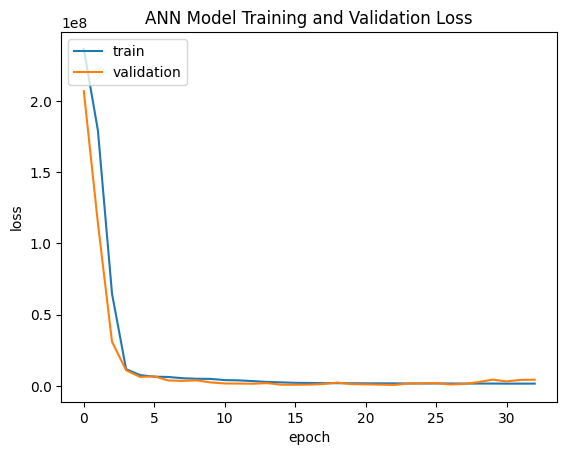

In [105]:
import matplotlib.pyplot as plt

#plot the mae as a function of the number of epochs
plt.plot(history_2.history['loss'], label=f'train')
plt.plot(history_2.history['val_loss'], label=f'validation')
plt.title('ANN Model Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Model Evaluation

In [111]:
from dmba import regressionSummary
print("Testing set performance:")
predY = model2.predict(testX)
regressionSummary(testY, predY)

Testing set performance:
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step

Regression statistics

                      Mean Error (ME) : 176.8387
       Root Mean Squared Error (RMSE) : 827.7127
            Mean Absolute Error (MAE) : 611.5175
          Mean Percentage Error (MPE) : 0.8744
Mean Absolute Percentage Error (MAPE) : 4.1474


In [ ]:
# accuracy for ANN
from sklearn.metrics import r2_score
r2 = r2_score(testY, predY)
print(f"R^2 Score: {r2}")

R^2 Score: 0.9119968414306641


## Actual vs Prediction Chart

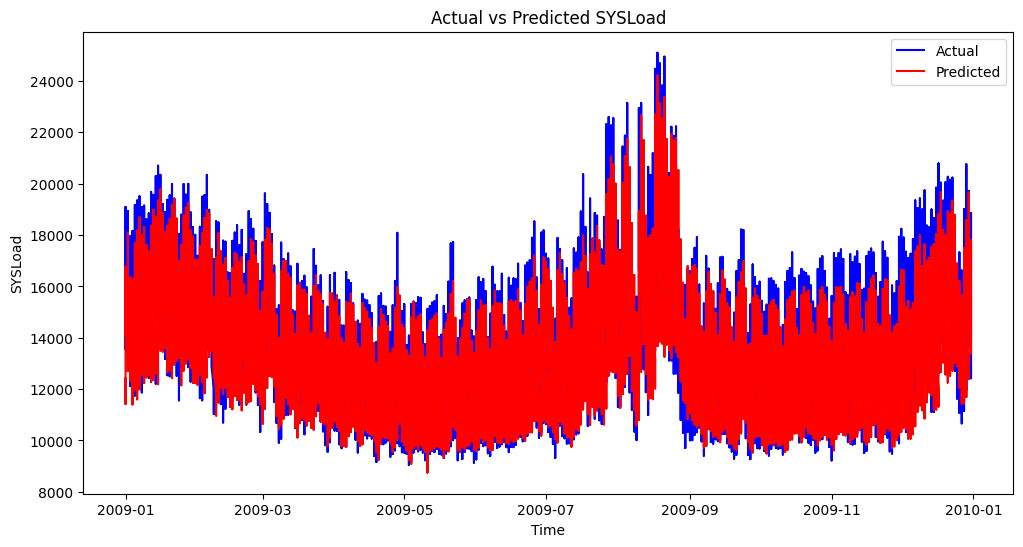

In [ ]:
# actual vs predicted plot
plt.figure(figsize=(12, 6))
plt.plot(data.Date[testInd], testY, label='Actual', color='blue')
plt.plot(data.Date[testInd], predY, label='Predicted', color='red')
plt.title('Actual vs Predicted SYSLoad')
plt.xlabel('Time')
plt.ylabel('SYSLoad')
plt.legend()
plt.show()

In [ ]:
# storing the model
import joblib
model_name = "ANN_model.h5"
model_file_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'inference', model_name))
model2.save(filepath=model_file_path)

In [129]:
# storing the compressed model
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'utils')))
from utils import save_compressed_model

# Compress and save the model
# utils/utils.py
filename = os.path.abspath(os.path.join(os.getcwd(), '..', 'inference', 'ann.h5'))
save_compressed_model(model2, filename=filename)

## Conclusion
1. High Predictive Accuracy: With an R² score of 0.912, the model explains over 91% of the variance in the target variable, indicating strong generalization to unseen data.

2. Low Error Magnitude: The MAE of 611.52 and RMSE of 827.71 suggest that the model makes relatively small prediction errors, with RMSE showing that large deviations are well-controlled.

3. Minimal Bias: A Mean Error (ME) of 176.84 and MPE of 0.87% indicate the model slightly overpredicts on average, but the bias is negligible in practical terms.

4. Excellent Relative Accuracy: The MAPE of 4.15% confirms that predictions are, on average, within 4% of actual values—well within acceptable bounds for most forecasting tasks.